# Project 3: Web APIs & Classification - Suicide vs Depression (1/3)
---


## Project Statement 

### Understanding differences between Depression and Suicide



**Background**

*Why*

The link between suicide and depression is well documented through statistics and research.

However, to say that depression is the cause of all suicides is a misguided generalization repeated many times too often. 

>Suicide is often due to a combination, sequence or repetition of distressing life events, and depression may just be one of the many stressors a person is struggling with. Someone who isn't depressed can still be at risk of suicide, and not everyone suffering from depression dies by suicide.<br><br>
*(Source: [Samaritans of Singapore](https://www.sos.org.sg/blog/10-myths-and-facts-about-suicide))*

Given the turbulent year excerbated by the outbreak of Covid-19, mental health cases are expected to increase. The World Health Organization (WHO) initiated a study to understand the intricate differences between the two illnesses, with a goal to identify and seperate potential suicide cases from depression cases accurately, thus directing resources quicker. 

*Where*

Social media channels have emerged as a popular outlet for people to publish their goodbye notes before their death attempt. Take the most recent case of Sam Cheung jumping down after his breakup with ex Miss Hongkong ([Link](https://www.todayonline.com/8days/sceneandheard/entertainment/miss-hongkong-contestants-ex-killed-himself-after-she-allegedly)) as an example. Social media giants currently face Trust and Safety challenges to deal with such content more ethically. 

Reddit has been a platform unexplored by WHO, thus this study focuses on analyzing suicide-content on the Reddit channel.

**Business Statement**

As a team of data scientists engaged by WHO, our objective is two-fold:

1. Build a model that accurately seperates suicide-related posts from depression-related posts from Reddit. While both illness are considered important, suicide-related content are time crucial.
<br>

2. Give insights to the behavioural differences between both illnesses. Exemplify insights with the type of language usuage, and list out tips to Reddit moderators on how to identify posts with suicidal intention.

## Project Organization

The analysis will be broken into 3 parts. This is the first part of the series where we will be collecting and analyzing the data:<br><br>
**1. Data Collection and Feature Engineering**<br>2. Model Selection and Tuning<br>3. Business Summary and Insights

## Contents of this notebook
1. [Project Statement](#Project-Statement)<br>
2. [Data Collection](#Data-Collection)<br>
    1. [Data Collection Overview](#Data-Collection-Overview)<br>
    2. [Importing Libraries](#Importing-Libraries)<br>
    3. [Submiting Requests](#Submiting-Requests)<br>
    4. [Webscrapping SuicideWatch Reddit](#Webscrapping-SuicideWatch-Reddit)<br>
        1. [Getting Requests](#Getting-Requests)<br>
        2. [Parsing into JSON](#Parsing-into-JSON)<br>
        3. [Peeking into Reddit Thread](#Peeking-into-Reddit-Thread)<br>
        4. [Webscrapping](#Webscrapping)<br>
    5. [Webscrapping Depression Reddit](#Webscrapping-Depression-Reddit)<br>
    6. [Exporting to CSV](#Exporting-to-CSV)<br>
3. [Data Preperation](#Data-Preperation)<br>
    1. [Data Preperation Overview](#Data-Preperation-Overview)<br>
    2. [Data Importing](#Data-Importing)<br>
    3. [Data Cleaning](#Data-Cleaning)<br>
        1. [Creating Target Columns](#Creating-Target-Columns)<br>
        2. [Dropping Irrelevant Columns](#Dropping-irrelevant-columns)<br>
        3. [Checking and Dropping Duplicates](#Checking-and-Dropping-Duplicates)<br>
        4. [Imputing for Nulls](#Imputing-for-Nulls)<br>
4. [Concatenating Datasets](#Concatenating-Datasets)<br>
5. [Feature Engineering](#Feature-Engineering)<br>
6. [EDA](#EDA)<br>
    1. [WordCloud](#WordCloud)<br>
    2. [Barplots](#Barplots-for-most-frequent-wordcounts)<br>
        1. [Titles Barplot](#Titles-Barplot)<br>
        2. [Posts Barplot](#Posts-Barplot)<br>
    3. [Word Count](#Word-Count)<br>
        1. [Titles Word Count](#Titles-Word-Count)<br>
        2. [Posts WordCount](#Posts-WordCount)<br>
    4. [Number of Comments](#Number-of-Comments)<br>
    5. [Investigation of Relationship between two threads](#Investigating-the-relationship-between-both-reddit-threads)<br>
        1. [Authors](#Authors)<br>
        2. [Checking for Crossposts](#Checking-for-Crossposts)<br>
        3. [Vocabulary in Posts](#Vocabulary-in-Posts)<br>
            1. [Posts Vocab](#Posts-Vocab)<br>
            2. [Titles Vocab](#Titles-Vocab)<br>
        4. [Common words in both threads](#Common-words-in-both-threads)<br>
7. [Data Prep for Modeling](#Data-Prep-for-Modeling)<br>
8. [Export for Modeling](#Export-for-Modeling)<br>

# Data Collection
---

## Data Collection Overview

- This section (Data Collection) focuses on scrapping via Reddit's API to extract around 1000 unique posts from two subreddits r/depression and r/SuicideWatch. 
- Due to the limitation set by Reddit API, gathering >1K posts is not doable. However, we believe that our model is still sufficiently robust to classify our target given this data restriction.
- Posts from both subreddits will ultimately be meshed and mixed together to feed our classification model as training data

## Importing Libraries

In [1]:
import requests
import pandas as pd
import time
import regex as re
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

## Submiting Requests

- Create URLs for the two subreddits

In [2]:
# for r/SuicideWatch subreddit
url_s = 'https://www.reddit.com/r/SuicideWatch.json'

In [3]:
# for r/depression subreddit
url_d = 'https://www.reddit.com/r/depression.json'

## Webscrapping SuicideWatch Reddit

- We'd begin with scraping SuicideWatch Reddit first, and taking a sneak peek into the posts extracted to ensure no irregularities. 

### Getting Requests

In [4]:
suicide = requests.get(url_s, headers = {'User-agent': 'Alicia'})

In [5]:
suicide.status_code

200

### Parsing into JSON

In [6]:
suicide = suicide.json()

### Peeking into Reddit Thread

In [7]:
print(suicide)

{'kind': 'Listing', 'data': {'modhash': '', 'dist': 27, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'SuicideWatch', 'selftext': 'We\'ve been seeing a worrying increase in pro-suicide content showing up here and, and also going unreported. This undermines our purpose here, so we wanted to highlight and clarify our guidelines about both direct and indirect incitement of suicide.  \n\nWe\'ve created a wiki that covers these issues.  We hope this will be helpful to anyone who\'s wondering whether something\'s okay here and which responses to report.  It explains in detail why *any* validation of suicidal intent, even an "innocent" message like "if you\'re 100% committed, I\'ll just wish you peace" is likely to increase people\'s pain, and why it\'s important to report even subtle pro-suicide comments. The full text of the wiki\'s current version is below, and it is maintained at [/r/SuicideWatch/wiki/incitement](http://www.reddit.com/r/SuicideWatch/wiki/incit

In [8]:
suicide['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [9]:
len(suicide['data']['children'])

27

In [10]:
suicide['data']['children'][0].keys()

dict_keys(['kind', 'data'])

In [11]:
suicide['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'SuicideWatch',
  'selftext': 'We\'ve been seeing a worrying increase in pro-suicide content showing up here and, and also going unreported. This undermines our purpose here, so we wanted to highlight and clarify our guidelines about both direct and indirect incitement of suicide.  \n\nWe\'ve created a wiki that covers these issues.  We hope this will be helpful to anyone who\'s wondering whether something\'s okay here and which responses to report.  It explains in detail why *any* validation of suicidal intent, even an "innocent" message like "if you\'re 100% committed, I\'ll just wish you peace" is likely to increase people\'s pain, and why it\'s important to report even subtle pro-suicide comments. The full text of the wiki\'s current version is below, and it is maintained at [/r/SuicideWatch/wiki/incitement](http://www.reddit.com/r/SuicideWatch/wiki/incitement). \n\nWe deeply appreciate everyone who gives responsive, 

In [12]:
suicide['data']['after']

't3_k4d3xi'

### Webscrapping

- We define a webscrapping function that returns a list of posts from the number of pages we want to crawl from the subreddit. Due to the limit set on the API, we could gather approximately around 990 unique posts only.

In [13]:
#Webscraping function 
def scrape (url, number_of_scrapes, output_list_name):
    
    after = None 
    
    for i in range(number_of_scrapes):
        if i == 0:
            print(f"scraping {url}")
            print(f"scraping batch {1} of {number_of_scrapes}")
        elif (i+1) % 4 ==0:
            print(f"scraping batch {i+1} of {number_of_scrapes}")
        
        if after == None:
            params = {}
        else:
            params = {"after": after}             
        res = requests.get(url, params=params, headers={'User-agent': 'Alicia'})
        
        if res.status_code == 200:
            the_json = res.json()
            output_list_name.extend(the_json["data"]["children"])
            after = the_json["data"]["after"]
        else:
            print(res.status_code)
            break
        
        time.sleep(random.randint(1,6))
    
    print("scraping done")
    print(f"no. of posts: {len(output_list_name)}")
    print(f"no. of unique posts: {len(set([p['data']['name'] for p in output_list_name]))}")

In [15]:
#scrapping r/SuicideWatch 52 times to try to get close to 1000 unique posts 
suicide_scraped = []
scrape(url_s, 52, suicide_scraped)

scraping https://www.reddit.com/r/SuicideWatch.json
scraping batch 1 of 55
scraping batch 4 of 55
scraping batch 8 of 55
scraping batch 12 of 55
scraping batch 16 of 55
scraping batch 20 of 55
scraping batch 24 of 55
scraping batch 28 of 55
scraping batch 32 of 55
scraping batch 36 of 55
scraping batch 40 of 55
scraping batch 44 of 55
scraping batch 48 of 55
scraping batch 52 of 55
scraping done
no. of posts: 1364
no. of unique posts: 990


- Next, we build a function that identifies and stores unique posts only

In [14]:
#create list of only unique data
def unique_list(original_list, new_list_name):
    new_list=[]
    for i in range(len(original_list)):
        if original_list[i]["data"]["name"] not in new_list:
            new_list_name.append(original_list[i]["data"])
            new_list.append(original_list[i]["data"]["name"])
    print(f"unique list contains {len(new_list_name)} unique posts")

In [16]:
#list of unique posts in r/SuicideWatch
suicide_unique = []
unique_list(suicide_scraped, suicide_unique)

unique list contains 990 unique posts


- We then store these posts in a dataframe labelled 'suicide'
- I've also added a target column 'is_suicidal' == 1 at this stage. This returns me a dataframe with 104 different information features

In [17]:
#saving into a dataframe
suicide = pd.DataFrame(suicide_unique)
#creating a target column
suicide['is_suicidal'] = 1
suicide.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_suicidal
0,None,SuicideWatch,We've been seeing a worrying increase in pro-s...,t2_1t70,False,None,1,False,New wiki on how to avoid accidentally encourag...,[],...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.567526e+09,0,None,False,NaN,1
1,None,SuicideWatch,"Activism, i.e. advocating or fundraising for s...",t2_1t70,False,None,1,False,Please remember that NO ACTIVISM of any kind i...,[],...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.599734e+09,0,None,False,NaN,1
2,None,SuicideWatch,,t2_8tv9jw37,False,None,0,False,i regret not having attempted to kill myself w...,[],...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.606753e+09,0,None,False,NaN,1
3,None,SuicideWatch,My experiences since developing severe depress...,t2_91p4lpdd,False,None,0,False,I never realized how little people care about ...,[],...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.606797e+09,0,None,False,NaN,1
4,None,SuicideWatch,I wish I could press a button and then *poof* ...,t2_7d5ao7fr,False,None,0,False,I wish I could just erase myself from existence.,[],...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.606761e+09,0,None,False,NaN,1


## Webscrapping Depression Reddit

- Next, we follow the same steps listed above to extract posts from r/depression
- We managed to extract 972 unique posts

In [18]:
depression_scraped = []
scrape(url_d, 52, depression_scraped)

scraping https://www.reddit.com/r/depression.json
scraping batch 1 of 52
scraping batch 4 of 52
scraping batch 8 of 52
scraping batch 12 of 52
scraping batch 16 of 52
scraping batch 20 of 52
scraping batch 24 of 52
scraping batch 28 of 52
scraping batch 32 of 52
scraping batch 36 of 52
scraping batch 40 of 52
scraping batch 44 of 52
scraping batch 48 of 52
scraping batch 52 of 52
scraping done
no. of posts: 1298
no. of unique posts: 972


In [19]:
depression_unique = []
unique_list(depression_scraped, depression_unique)

unique list contains 972 unique posts


- Likewise, I store these unique posts in a dataframe labelled 'depression', with a target column 'is_suicidal'== 0. 
- Similar to Suicide dataframe, we have 104 features thereafter

In [20]:
depression = pd.DataFrame(depression_unique)
depression['is_suicidal'] = 0
depression.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_suicidal
0,None,depression,We understand that most people who reply immed...,t2_1t70,False,None,1,False,Our most-broken and least-understood rules is ...,[],...,no_ads,True,https://www.reddit.com/r/depression/comments/d...,704962,1.572361e+09,1,None,False,NaN,0
1,None,depression,Welcome to /r/depression's check-in post - a p...,t2_1t70,False,None,1,False,"Regular Check-In Post. Plus, a reminder about ...",[],...,no_ads,True,https://www.reddit.com/r/depression/comments/i...,704962,1.599735e+09,0,None,False,NaN,0
2,None,depression,"You're alive, but you aren't living. You feel ...",t2_8gqsmne1,False,None,0,False,Anhedonia is the worst part of depression,[],...,no_ads,False,https://www.reddit.com/r/depression/comments/k...,704962,1.606778e+09,1,None,False,NaN,0
3,None,depression,Last therapy session I was explaining to my ps...,t2_42vnt53s,False,None,0,False,Psychologist asked me what my inner child look...,[],...,no_ads,False,https://www.reddit.com/r/depression/comments/k...,704962,1.606749e+09,0,None,False,NaN,0
4,None,depression,no matter how much i sleep im never rested. ev...,t2_7sced9j9,False,None,0,False,i want to sleep away my life,[],...,no_ads,False,https://www.reddit.com/r/depression/comments/k...,704962,1.606761e+09,0,None,False,NaN,0


## Exporting to CSV

In [21]:
suicide.to_csv('./datasets/suicideraw_1k.csv', index=False)
depression.to_csv('./datasets/depressionraw_1k.csv', index=False)

# Data Preperation
---

## Data Preperation Overview

This section aims to output workable data for exploratory analysis further on. This section comprises of:

1. Removing and adding relevant columns
2. Checking and removing duplicate posts
3. Dealing with Null data


## Data Importing
I'm importing and assigning a different name to my datasets so I can re-run this script without modifying the functions above

In [2]:
suicide_1k = pd.read_csv('./datasets/suicideraw_1k.csv')
depression_1k = pd.read_csv('./datasets/depressionraw_1k.csv')

## Data Cleaning

### Creating Target Columns

- Creating target columns in both dataframes 

In [3]:
suicide_1k['is_suicidal'] = 1
depression_1k['is_suicidal'] = 0

In [4]:
#displaying suicide dataframe
pd.set_option('display.max_columns',None)
suicide_1k.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_suicidal
0,NaN,SuicideWatch,We've been seeing a worrying increase in pro-s...,t2_1t70,False,NaN,1,False,New wiki on how to avoid accidentally encourag...,[],r/SuicideWatch,False,0,NaN,0,NaN,False,t3_cz6nfd,False,dark,0.99,NaN,public,1730,23,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,1730,NaN,True,NaN,1600562141.0,modmsg,[],"{'gid_1': 4, 'gid_2': 1}",NaN,True,NaN,1.567555e+09,text,0,NaN,NaN,text,self.SuicideWatch,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qpzs,NaN,NaN,NaN,cz6nfd,True,NaN,SQLwitch,NaN,253,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/cz6nfd/new_wiki_on_ho...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.567526e+09,0,NaN,False,NaN,1
1,NaN,SuicideWatch,"Activism, i.e. advocating or fundraising for s...",t2_1t70,False,NaN,1,False,Please remember that NO ACTIVISM of any kind i...,[],r/SuicideWatch,False,0,NaN,0,NaN,False,t3_iq0w21,False,dark,0.99,NaN,public,1092,8,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,1092,NaN,True,NaN,1599854080.0,modmsg,[],{'gid_2': 1},NaN,True,NaN,1.599763e+09,text,0,NaN,NaN,text,self.SuicideWatch,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qpzs,NaN,NaN,NaN,iq0w21,True,NaN,SQLwitch,NaN,62,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/iq0w21/please_remembe...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.599734e+09,0,NaN,False,NaN,1
2,NaN,SuicideWatch,NaN,t2_8tv9jw37,False,NaN,0,False,i regret not having attempted to kill myself w...,[],r/SuicideWatch,False,0,NaN,0,NaN,False,t3_k3z1w6,False,dark,1.00,NaN,public,848,6,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,848,NaN,False,NaN,False,modmsg,[],{'gid_1': 1},NaN,True,NaN,1.606782e+09,text,0,NaN,NaN,text,self.SuicideWatch,True,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qpzs,NaN,NaN,NaN,k3z1w6,True,NaN,Prudent_Struggle_733,NaN,93,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/k3z1w6/i_regret_not_h...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,242660,1.606753e+09,0,NaN,False,NaN,1
3,NaN,SuicideWatch,My experiences since developing severe depr

In [5]:
#confirming the shape of suicide dataframe
suicide_1k.shape

(990, 104)

In [6]:
#displaying depression dataframe
depression_1k.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_suicidal
0,NaN,depression,We understand that most people who reply immed...,t2_1t70,False,NaN,1,False,Our most-broken and least-understood rules is ...,[],r/depression,False,0,NaN,0,NaN,False,t3_doqwow,False,dark,1.00,NaN,public,2321,53,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,2321,NaN,True,NaN,False,NaN,[],"{'gid_1': 1, 'gid_2': 1}",NaN,True,NaN,1.572390e+09,text,0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,doqwow,True,NaN,SQLwitch,NaN,175,True,no_ads,False,[],False,NaN,/r/depression/comments/doqwow/our_mostbroken_a...,no_ads,True,https://www.reddit.com/r/depression/comments/d...,704962,1.572361e+09,1,NaN,False,NaN,0
1,NaN,depression,Welcome to /r/depression's check-in post - a p...,t2_1t70,False,NaN,1,False,"Regular Check-In Post. Plus, a reminder about ...",[],r/depression,False,0,NaN,0,NaN,False,t3_iq10oq,False,dark,1.00,NaN,public,580,20,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,580,NaN,True,NaN,1599854110.0,NaN,[],"{'gid_1': 2, 'gid_2': 1}",NaN,True,NaN,1.599764e+09,text,0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,iq10oq,True,NaN,SQLwitch,NaN,2132,False,no_ads,False,[],False,NaN,/r/depression/comments/iq10oq/regular_checkin_...,no_ads,True,https://www.reddit.com/r/depression/comments/i...,704962,1.599735e+09,0,NaN,False,NaN,0
2,NaN,depression,"You're alive, but you aren't living. You feel ...",t2_8gqsmne1,False,NaN,0,False,Anhedonia is the worst part of depression,[],r/depression,False,0,NaN,0,NaN,False,t3_k47q9a,False,dark,1.00,NaN,public,1049,4,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,1049,NaN,False,NaN,False,NaN,[],{'gid_1': 1},NaN,True,NaN,1.606806e+09,text,0,NaN,NaN,text,self.depression,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qqqf,NaN,NaN,NaN,k47q9a,True,NaN,DiscardableLikeMe,NaN,96,True,no_ads,False,[],False,NaN,/r/depression/comments/k47q9a/anhedonia_is_the...,no_ads,False,https://www.reddit.com/r/depression/comments/k...,704962,1.606778e+09,1,NaN,False,NaN,0
3,NaN,depression,Last therapy session I was explaining to my ps...,t2_42vnt53s

In [7]:
#confirming the shape of depression dataframe
depression_1k.shape

(972, 104)

### Dropping irrelevant columns
* Dropping moderator's posts
* Keeping only Target columns,Title posts, Text Bodies, Author, Comments and Cross posts data

For Suicide Subreddit

In [8]:
#dropping moderator's posts
suicide_1k.drop(suicide_1k[suicide_1k['distinguished']=='moderator'].index, inplace=True)

In [9]:
#retaining columns relevant to our analysis only
suicide_1k = suicide_1k[['subreddit','title', 'selftext','author','num_comments','num_crossposts','is_suicidal']]

In [10]:
suicide_1k.head()

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
2,SuicideWatch,i regret not having attempted to kill myself w...,NaN,Prudent_Struggle_733,93,0,1
3,SuicideWatch,I never realized how little people care about ...,My experiences since developing severe depress...,wellshlt,5,0,1
4,SuicideWatch,I wish I could just erase myself from existence.,I wish I could press a button and then *poof* ...,bruhiminsane,34,0,1
5,SuicideWatch,Is being depressed and suicidal just a normal ...,We're constantly told that everything will get...,Emphasis_Curious,16,0,1
6,SuicideWatch,Suicide feels like the only option,I'm 17 and I live in Japan. Life is becoming t...,insufferable_pain,14,0,1


For Depression Subreddit

In [11]:
#dropping moderator's posts
depression_1k.drop(depression_1k[depression_1k['distinguished']=='moderator'].index, inplace=True)

In [12]:
#retaining columns relevant to our analysis only
depression_1k = depression_1k[['subreddit','title', 'selftext','author','num_comments','num_crossposts','is_suicidal']]

In [13]:
depression_1k.head()

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
2,depression,Anhedonia is the worst part of depression,"You're alive, but you aren't living. You feel ...",DiscardableLikeMe,96,1,0
3,depression,Psychologist asked me what my inner child look...,Last therapy session I was explaining to my ps...,phoebadoeb,70,0,0
4,depression,i want to sleep away my life,no matter how much i sleep im never rested. ev...,sinxzs,22,0,0
5,depression,"I don’t want to kill myself, I don’t necessari...","I’ve felt this way for a while now, yesterday ...",JumboSnausage,20,0,0
6,depression,Wish I could restart my life,"Wish I could restart my life with a new body, ...",GreDamaso,5,0,0


- Printing the shape of our updated dataframes

In [14]:
print(suicide_1k.shape)
print(depression_1k.shape)

(988, 7)
(970, 7)


### Checking and Dropping Duplicates

Checking for Duplicates
- Python identified more duplicates than the actual count.
- After examining the list of duplicates, I decided to only drop one post from the Suicide dataframe. 
- As for the Depression dataframe, there are no deemed duplicates

In [15]:
#there is only one duplicated post for suicide, ie Index 407 and 685
suicide_1k[(suicide_1k.duplicated(subset=['selftext'])) & (suicide_1k['selftext'] != '')]\
                .sort_values(ascending=False, by='selftext') \
                ['title']

407    The thought of a girl ever being sexually attr...
685    The thought of a girl ever being sexually attr...
12                         i dont wanna wake up tomorrow
24     everything i do is to make my dad happy but he...
28     I need to die... I can't keep doing this... I ...
39     Don't you just wish having cancer and die natu...
74     Someone in my life died a few days ago and it ...
82            I am really tempted to kill myself tonight
87           İ might commit suicide. dont chance my mind
94     i want to end it all, i lost my bestfriend, my...
137    i choked myself a few days ago and its hard to...
148    Going on the deepweb🤦‍♀️Literally . Well Peace...
150    Hi all, if I have chronic suicidal ideation , ...
157    I will kill myself. I just wanted someone to k...
170                     Social Services promotes suicide
194     I don’t really see much point in trying anymore.
221    What is the point in life. I just want to esca...
227                            

In [16]:
#there are no duplicates for depression
depression_1k[(depression_1k.duplicated(subset=['selftext'])) & (depression_1k['selftext'] != '')]\
                .sort_values(ascending=False, by='selftext') \
                ['title']

729                                         OCD and LSD?
57     It's the worst when you want to die so bad but...
241    Don't wanna kms but don't wanna live anymore. ...
258                            I feel like I'm drowning.
273                              my life is a trainwreck
281    It’s better to think you’re an fat ugly piece ...
295                                       I am so scared
301    i don’t quite want to kill myself, but i don’t...
326      God I really really really hate myself so much.
366    Ever since I was 10 years old (I’m 16 now) I’v...
367    is there actual good advice here or anywhere i...
545    I dont feel anything anymore because i dont wa...
553    im very numb to many emotions and i now i feel...
626                    i don’t want to wake up tomorrow.
765    Why should i be forced to go to school if its ...
822    Is it normal to start avoiding hobbies that yo...
834    What does it mean when you are faced with a sm...
849    Does anyone enjoy imagin

- Keeping Unique Posts only by dropping the duplicate from suicide dataframe

In [17]:
suicide_1k = suicide_1k.drop(407)

- After this, we have 987 unique posts in suicide, and 17 posts lesser (970 in total) for depression

In [18]:
print(suicide_1k.shape)
print(depression_1k.shape)

(987, 7)
(970, 7)


### Imputing for Nulls
- Checking for Nulls

In [21]:
suicide_1k.isnull().sum()

subreddit          0
title              0
selftext          57
author             0
num_comments       0
num_crossposts     0
is_suicidal        0
dtype: int64

In [22]:
depression_1k.isnull().sum()

subreddit          0
title              0
selftext          20
author             0
num_comments       0
num_crossposts     0
is_suicidal        0
dtype: int64

- Identifying rows with nulls

In [23]:
suicide_1k[suicide_1k['selftext'].isnull()]

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
2,SuicideWatch,i regret not having attempted to kill myself w...,NaN,Prudent_Struggle_733,93,0,1
12,SuicideWatch,i dont wanna wake up tomorrow,NaN,Itchy-Occasion7193,11,0,1
24,SuicideWatch,everything i do is to make my dad happy but he...,NaN,thotimusprime227,3,0,1
28,SuicideWatch,I need to die... I can't keep doing this... I ...,NaN,YouCantHelpMeButThx,2,0,1
39,SuicideWatch,Don't you just wish having cancer and die natu...,NaN,throwawaytothecliff,15,0,1
74,SuicideWatch,Someone in my life died a few days ago and it ...,NaN,michaelarp12,3,0,1
82,SuicideWatch,I am really tempted to kill myself tonight,NaN,ConclusionOrganic824,1,0,1
87,SuicideWatch,İ might commit suicide. dont chance my mind,NaN,Murder_Tuna,14,0,1
94,SuicideWatch,"i want to end it all, i lost my bestfriend, my...",NaN,ddreamy123,2,0,1
137,SuicideWatch,i choked myself a few days ago and its hard to...,NaN,justherefr,1,0,1


In [24]:
depression_1k[depression_1k['selftext'].isnull()]

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
43,depression,I’m broken. Please return to sender.,NaN,throwRA69420-,0,0,0
57,depression,It's the worst when you want to die so bad but...,NaN,Emma7123,1,0,0
241,depression,Don't wanna kms but don't wanna live anymore. ...,NaN,GreDamaso,1,0,0
258,depression,I feel like I'm drowning.,NaN,_-_DarkLolabuy_-_,0,0,0
273,depression,my life is a trainwreck,NaN,c01ca04,1,0,0
281,depression,It’s better to think you’re an fat ugly piece ...,NaN,Aggressive_Zombie194,1,0,0
295,depression,I am so scared,NaN,turkanelif,1,0,0
301,depression,"i don’t quite want to kill myself, but i don’t...",NaN,lirodaniela02,3,0,0
326,depression,God I really really really hate myself so much.,NaN,FerromagneticBadger,0,0,0
366,depression,Ever since I was 10 years old (I’m 16 now) I’v...,NaN,Shinjuiikari,0,0,0


- After examining the null rows, it appears that those authors either write on the title or body text. To me, they are still considered as valid posts which contains data/words for the model to train on. Thus I will be filling in empty fields with spaces

In [25]:
suicide_1k.fillna(' ', inplace=True)
depression_1k.fillna(' ', inplace=True)

- Confirming zero nulls

In [26]:
suicide_1k.isnull().sum()

subreddit         0
title             0
selftext          0
author            0
num_comments      0
num_crossposts    0
is_suicidal       0
dtype: int64

In [27]:
depression_1k.isnull().sum()

subreddit         0
title             0
selftext          0
author            0
num_comments      0
num_crossposts    0
is_suicidal       0
dtype: int64

# Concatenating Datasets

Here, I combine both dataframes (Suicide and Depression) into one master dataframe (df_1k) for easy data processing.

In [28]:
df_1k = pd.concat([suicide_1k, depression_1k])
df_1k.reset_index(drop=True, inplace=True)

In [29]:
print(f' Combined Dataframe for 1K shape is {df_1k.shape}')
df_1k.head()

 Combined Dataframe for 1K shape is (1957, 7)


,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
0,SuicideWatch,i regret not having attempted to kill myself w...,,Prudent_Struggle_733,93,0,1
1,SuicideWatch,I never realized how little people care about ...,My experiences since developing severe depress...,wellshlt,5,0,1
2,SuicideWatch,I wish I could just erase myself from existence.,I wish I could press a button and then *poof* ...,bruhiminsane,34,0,1
3,SuicideWatch,Is being depressed and suicidal just a normal ...,We're constantly told that everything will get...,Emphasis_Curious,16,0,1
4,SuicideWatch,Suicide feels like the only option,I'm 17 and I live in Japan. Life is becoming t...,insufferable_pain,14,0,1


# Feature Engineering

This section involves converting raw text (the user's submission on Reddit) to more useful forms where algorthims can operate on. This consists of: 

* Remove non-letters: Remove special characters and numbers
* Lowercase all words and split word up
* Remove stopwords: These are common words that are not useful for classification as they do not add significance to the topic. 
* I have also added on some stopwords that reveal the subreddit names, like 'suicide', 'suicidal, 'depressed', 'depression'.
* Text normalization techniques that reduces a word to its root form. Here I decided on lemmatization over stemming as I wish to retain better precision and tap on computational power as the corpus is still considered small. Stemming is a more crude heuristic process that chops off the ends of words, and thus not ideal when my goal is to understand the choice of words a sucidal person might use.

In [30]:
def meaningful_text(raw_text): 
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove HTML
    review_text = BeautifulSoup(raw_text).get_text()
    
    # Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # Convert words to lower case and split each word up
    words = letters_only.lower().split()
    
    # Searching through a set is faster than searching through a list 
    # Hence, we will convert stopwords to a set
    stops = set(stopwords.words('english'))
    
    # Add certain keywords like Depression and Suicide to stopwords
    stops.update(['suicide','suicidal','depressed','depression','http','www','com'])
    
    # Remove stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Stemming words
    meaningful_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
   
    # Join words back into one string, with a space in between each word
    return(" ".join(meaningful_words))

In [31]:
#creating three new columns to store the lemmatized cleaned texts
df_1k['selftext_cleaned'] = df_1k['selftext'].map(meaningful_text)
df_1k['title_cleaned'] = df_1k['title'].map(meaningful_text)
df_1k['selftext_title_clean'] = df_1k['selftext_cleaned'] + " " + df_1k['title_cleaned']

/Users/aliciatay/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/aliciatay/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:314: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [32]:
#printing out the updated dataframe
df_1k.head()

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal,selftext_cleaned,title_cleaned,selftext_title_clean
0,SuicideWatch,i regret not having attempted to kill myself w...,,Prudent_Struggle_733,93,0,1,,regret attempted kill chance feel trapped real...,regret attempted kill chance feel trapped rea...
1,SuicideWatch,I never realized how little people care about ...,My experiences since developing severe depress...,wellshlt,5,0,1,experience since developing severe anxiety eye...,never realized little people care started ment...,experience since developing severe anxiety eye...
2,SuicideWatch,I wish I could just erase myself from existence.,I wish I could press a button and then *poof* ...,bruhiminsane,34,0,1,wish could press button poof instantly booted ...,wish could erase existence,wish could press button poof instantly booted ...
3,SuicideWatch,Is being depressed and suicidal just a normal ...,We're constantly told that everything will get...,Emphasis_Curious,16,0,1,constantly told everything get better exercise...,normal part growing accepting harsh reality world,constantly told everything get better exercise...
4,SuicideWatch,Suicide feels like the only option,I'm 17 and I live in Japan. Life is becoming t...,insufferable_pain,14,0,1,live japan life becoming harsh recently high s...,feel like option,live japan life becoming harsh recently high s...


# EDA


In [61]:
#Here, I've updated the list of stopwords to include more words eg "feel","like","feel like" as these words appear frequently across both subreddits
#Adding them to the stopwords will ensure a more unique set of vocab being fed into the model, helping it to distinguish the subreddits better
stops = set(stopwords.words('english'))
stops.update(['suicide','suicidal','depressed','depression','feel','like','feel like'])

#defining cvec
cvec = CountVectorizer(stop_words = stops, ngram_range=(2,3))

In [34]:
#seperating posts and titles from the two subreddits
suicidal1k_posts = df_1k[df_1k['is_suicidal']==1]['selftext_cleaned']
suicidal1k_titles = df_1k[df_1k['is_suicidal']==1]['title_cleaned']
depression1k_posts = df_1k[df_1k['is_suicidal']==0]['selftext_cleaned']
depression1k_titles = df_1k[df_1k['is_suicidal']==0]['title_cleaned']

### WordCloud



Commonality:
- Performing word cloud visualizations does not seem to add value to insights as words such as 'life', 'want' ,'know', 'get' appears in both visuals. Other seemingly less frequent words such as 'fucking','something', 'anymore' also appears equally
- However, it does provide a higher-level understanding about the commonalities of both suicidal and depressed people where it appears that they tend to relate back to 'life' while penning their posts, and the usage of 'want' connotates a strong desire for things to get better.
- Similarily, both WordClouds draws connections to social ties, such as 'family', 'friend', college'

Differences:
- It is interesting to note that only the Suicide WordCloud (albeit appearing less frequent than I had expected it to be) contains the word 'kill', unlike the Depression WordCloud. Both reddits had the word 'die', which is rather expected.
- Another point of difference is that Suicide Reddit has more frequent occurences of words that connotates finality, eg 'gone' ,'done','last'and 'end'. The Depression Reddit had more words which describes feelings instead, eg 'sad','anxiety', and contextual words like 'jobs','sleep'

In [62]:
#creating a function to build wordclouds for the different subreddits
def plot_wordcloud(subreddit, title):
    text = df_1k[df_1k['subreddit']==subreddit]['selftext_title_clean'].values # Clean text that we want to wordcloud
    wordcloud = WordCloud(width=2000, 
                          height=1000, 
                          background_color='black', 
                          max_words=200,
                          colormap='Set1',
                          collocations=False,
                         stopwords = stops).generate(str(text))
    plt.figure(figsize=(12,10))
    plt.title(title, fontsize=15, weight='bold')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Removes the axis

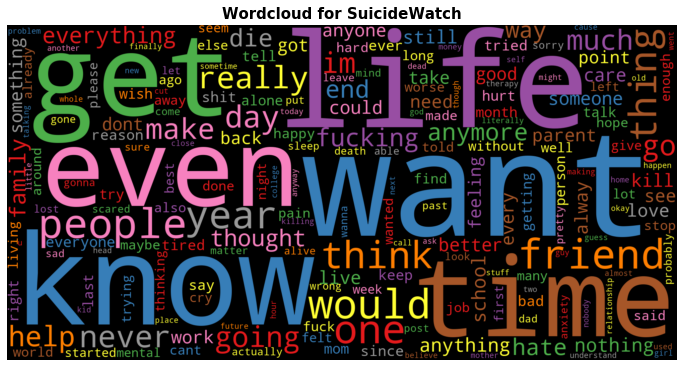

In [63]:
plot_wordcloud('SuicideWatch', 'Wordcloud for SuicideWatch')

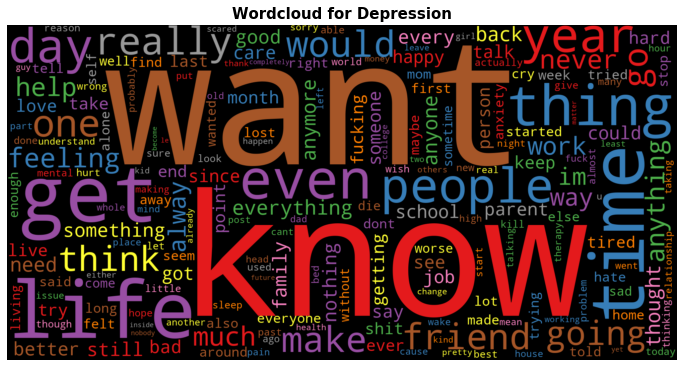

In [64]:
plot_wordcloud('depression', 'Wordcloud for Depression')

### Barplots for most frequent wordcounts

In this section, we plot the most common bi-grams across posts, and titles of the two subreddits and compare them side-by-side

#### Titles Barplot

- Examining the vocabulary across the titles, the counts of 'want die' and 'want end' appearing in the Suicide reddit is outstanding, and far more frequent than other word results.
- Another observation which supports my evaulation earlier, is that Depression reddit tends to include more words of emotions and feelings (ie 'dont know') and displays a certain degree of hope and intention to get better (ie 'want live')
- While the Suicidal reddit also tend to have words that expresses intention to get better, the frequency count of finality words and darker emotions are as high and frequent too (ie 'going kill', 'want kill', 'fuck fuck')
- This preliminary leads me to conclude that while both reddits have intentions of getting better and containing emotive words, Sucidial posts tend to be often mixed with expressions of death

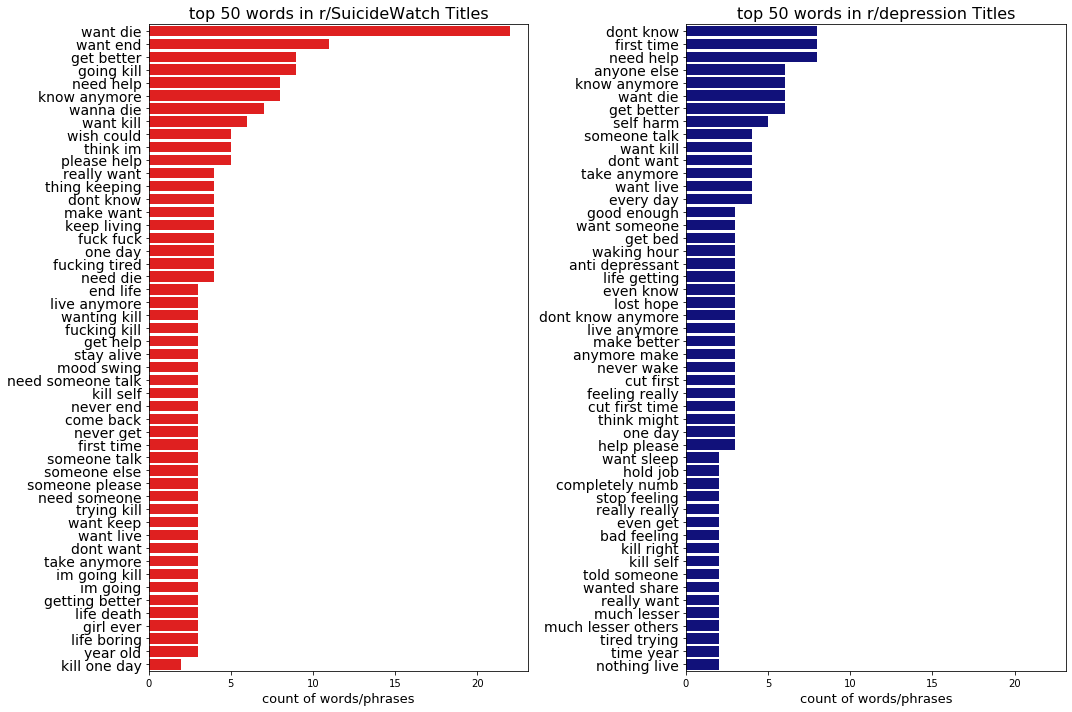

In [65]:
# r/SuicideWatch - fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_s = cvec.fit_transform(suicidal1k_titles)
vec_s = pd.DataFrame(vec_s.toarray(), columns = cvec.get_feature_names())
s_title_50 = vec_s.sum().sort_values(ascending=False).head(50)

# r/depression - fit/transform count vectoriser to title and get the 50 phrases with the highest count
vec_d = cvec.fit_transform(depression1k_titles)
vec_d = pd.DataFrame(vec_d.toarray(), columns = cvec.get_feature_names())
d_title_50 = vec_d.sum().sort_values(ascending=False).head(50)

# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=s_title_50.index.values, x = s_title_50,color='red',ax=ax[0])
ax[0].set_title('top 50 words in r/SuicideWatch Titles',fontsize=16)
ax[0].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=d_title_50.index.values, x = d_title_50,color='darkblue',ax=ax[1])
ax[1].set_title('top 50 words in r/depression Titles',fontsize=16)
ax[1].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

#### Posts Barplot

- Looking at both reddits posts, the count frequency for 'want die' in Suicide reddit appears close to 100 times, which is more than twice then in the Depression reddit
- However, other than 'want die', the other text results seem to appear in the same frequency in both reddits

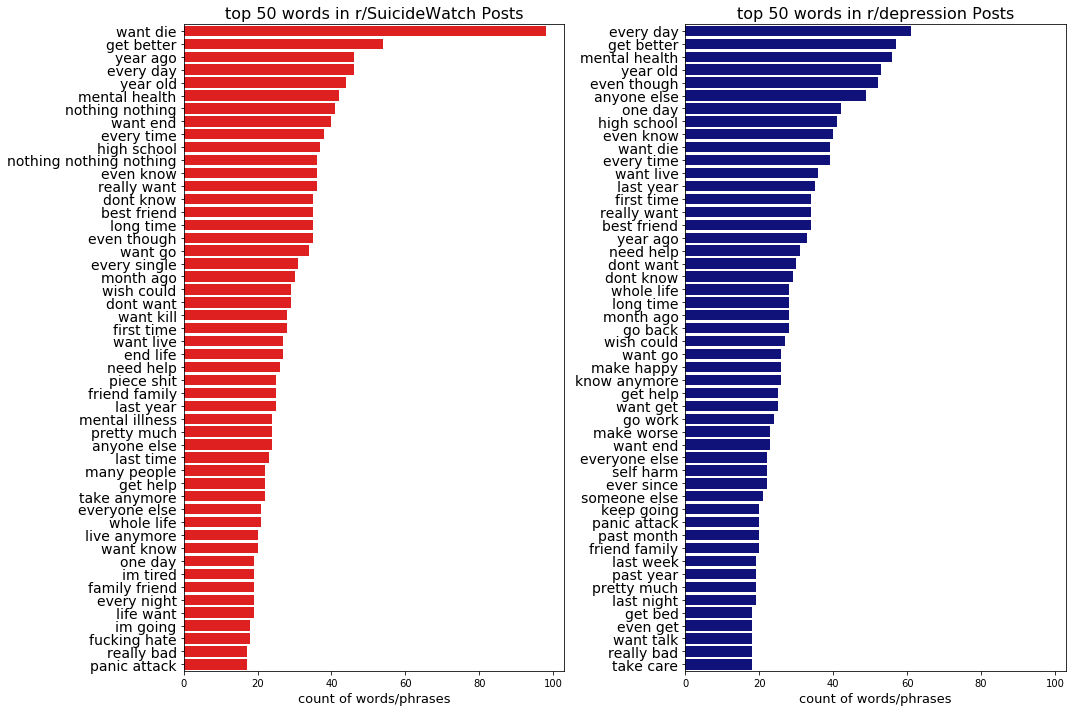

In [67]:
# r/SuicideWatch - fit/transform count vectoriser to posts and get the 50 phrases with the highest count
vec_s_posts = cvec.fit_transform(suicidal1k_posts)
vec_s_posts = pd.DataFrame(vec_s_posts.toarray(), columns = cvec.get_feature_names())
s_posts_50 = vec_s_posts.sum().sort_values(ascending=False).head(50)

# r/depression - fit/transform count vectoriser to posts and get the 50 phrases with the highest count
vec_d_posts = cvec.fit_transform(depression1k_posts)
vec_d_posts = pd.DataFrame(vec_d_posts.toarray(), columns = cvec.get_feature_names())
d_posts_50 = vec_d_posts.sum().sort_values(ascending=False).head(50)

# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

sns.barplot(y=s_posts_50.index.values, x = s_posts_50,color='red',ax=ax[0])
ax[0].set_title('top 50 words in r/SuicideWatch Posts',fontsize=16)
ax[0].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=d_posts_50.index.values, x = d_posts_50,color='darkblue',ax=ax[1])
ax[1].set_title('top 50 words in r/depression Posts',fontsize=16)
ax[1].set_xlabel('count of words/phrases', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

### Word Count

In this section, we look at the length of words in the titles and posts of the two subreddits to see if there is a pattern

#### Titles Word Count

- We look at barplots to analyze the length of the titles as I want to see the distribution of the data and number of edge cases.

- Looking at the charts and considering the mean word counts of both reddits (21 for depression and 22 for suicide), I can conclude that many titles in either subreddits are almost at the same length, although the SuicideWatch thread as a bigger spread and more variance in the data.

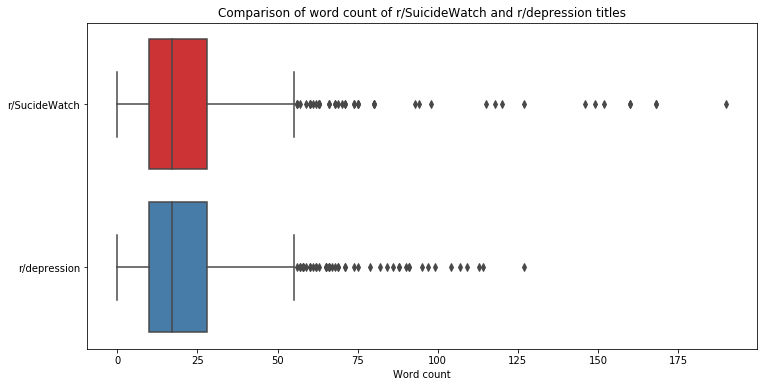

In [71]:
suicidal1k_title_count = [len(x) for x in suicidal1k_titles]
depression1k_title_count = [len(x) for x in depression1k_titles]
df1k_count_titles = pd.DataFrame([suicidal1k_title_count, depression1k_title_count]).T
df1k_count_titles.columns = ['r/SucideWatch', 'r/depression']
plt.figure(figsize = (12,6))
sns.boxplot(data = df1k_count_titles, orient = 'h', palette='Set1')
plt.title('Comparison of word count of r/SuicideWatch and r/depression titles')
plt.xlabel('Word count');

In [72]:
print(f'mean word count for titles in r/depression {np.mean(depression1k_title_count)}')
print(f'mean word count for titles in r/SuicideWatch {np.mean(suicidal1k_title_count)}')

mean word count for titles in r/depression 21.5659793814433
mean word count for titles in r/SuicideWatch 22.38095238095238


#### Posts WordCount

- Looking at the text count for posts in both reddits, Suicide authors tend to write 100 words lesser on the average.
- The shape of the distribution of both threads looks similar, with the median line appearing at the same space
- There is a unique post in the depression thread that had >12000 count. It was a long detailed story about an author's life event. However, as SuicideWatch threads also contains recounts of lifeevents, this observation does not add as a useful insight due for further investigation 

In [68]:
suicidal1k_posts_count = [len(x) for x in suicidal1k_posts]
depression1k_posts_count = [len(x) for x in depression1k_posts]

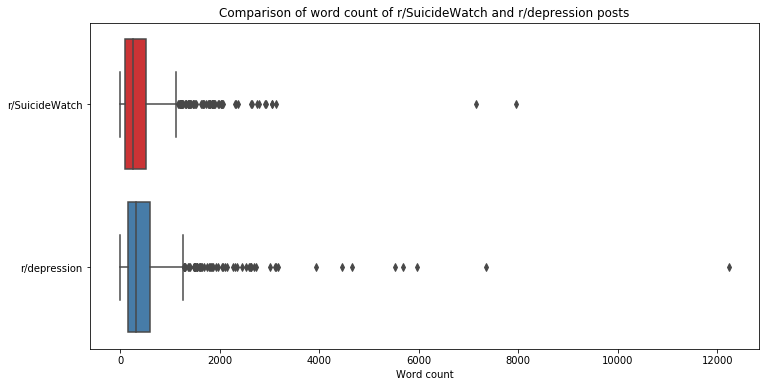

In [69]:
df1k_count_posts = pd.DataFrame([suicidal1k_posts_count, depression1k_posts_count]).T
df1k_count_posts.columns = ['r/SuicideWatch', 'r/depression']
plt.figure(figsize = (12,6))
sns.boxplot(data = df1k_count_posts, orient = 'h',palette='Set1')
plt.title('Comparison of word count of r/SuicideWatch and r/depression posts')
plt.xlabel('Word count');

In [70]:
print(f'mean word count for posts in r/depression {np.mean(depression1k_posts_count)}')
print(f'mean word count for posts in r/SuicideWatch {np.mean(suicidal1k_posts_count)}')

mean word count for posts in r/depression 506.37113402061857
mean word count for posts in r/SuicideWatch 416.5146909827761


### Number of Comments

- Next, I looked at the number of comments posted to both threads
- My natural assumption was that more comments would be posted to SuicideWatch thread as the posts there would be more alarming and disconcerting, thus triggering more concern
- The boxplot indicates that there is a greater variability for SuicideWatch, as well as more outliers. However, the notches in both boxplots appear to overlap, indicating that the the median value of number of comments appears to be the same.
- Based on the mean count as well, the average number of comments received for both threads is around 1 comment lesser for r/depression only

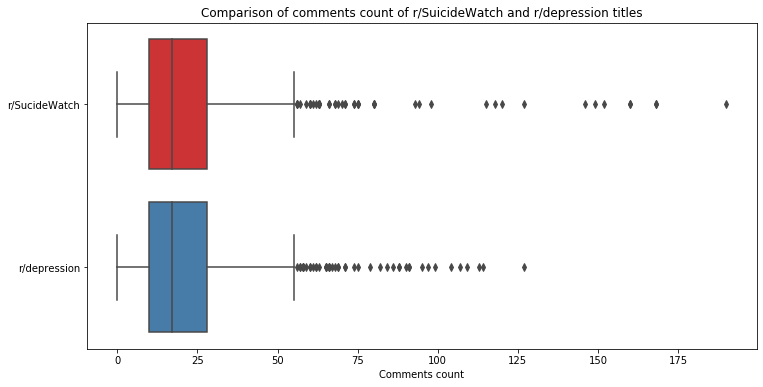

In [73]:
suicidal1k_comments_count = df_1k[df_1k['is_suicidal']==1]['num_comments']
depression1k_comments_count = df_1k[df_1k['is_suicidal']==0]['num_comments']


df1k_count_comments= pd.DataFrame([suicidal1k_comments_count, depression1k_comments_count]).T
df1k_count_titles.columns = ['r/SucideWatch', 'r/depression']
plt.figure(figsize = (12,6))
sns.boxplot(data = df1k_count_titles, orient = 'h',palette='Set1')
plt.title('Comparison of comments count of r/SuicideWatch and r/depression titles')
plt.xlabel('Comments count');

In [126]:
#SuicideWatch receives on average 1 more comment per post than compared to r/depression
print(f'mean comment count for r/depression {np.mean(depression1k_comments_count)}')
print(f'mean comment count for r/SuicideWatch {np.mean(suicidal1k_comments_count)}')

mean comment count for r/depression 3.41340206185567
mean comment count for r/SuicideWatch 4.931104356636271


### Investigating the relationship between both reddit threads

Given the strong similarities between both threads, I wanted to investigate further if the online behaviour for both threads are the same, specifically
1. If authors writing on both threads are the same people
2. If authors tend to crosspost the same submission to either threads
3. Dive deeper into the most commonly used vocabulary in both posts. I decided to analyze further as it was quite hard for me understand the frequency of words from the WordCloud visualization plotted earlier 

#### Authors

- There is around ~5% of authors who post both on r/SuicideWatch and r/depression threads.

In [75]:
author_s = df_1k['author'][df_1k['is_suicidal'] == 1]
author_d = df_1k['author'][df_1k['is_suicidal'] == 0]

print(f' number of r/depression authors who posted in r/SuicideWatch = {author_d.isin(author_s).sum()}')
print(f' number of r/SucideWatch authors who posted in r/depression = {author_s.isin(author_d).sum()}')

 number of r/depression authors who posted in r/SuicideWatch = 38
 number of r/SucideWatch authors who posted in r/depression = 42


In [151]:
#about the number of depression authors who also posted on r/SuicideWatch makes up 3.9%
# of the total SuicideWatch authors
38/(df_1k['author'][df_1k['is_suicidal'] == 0].shape[0])

0.03917525773195876

In [152]:
#about the number of sucidal authors who also posted on r/depression makes up 4.3%
# of the total r/depression authors
42/(df_1k['author'][df_1k['is_suicidal'] == 0].shape[0])

0.04329896907216495

#### Checking for Crossposts

- Given that there are authors who post on two threads, do they post the same story?
- Looking at the number of crossposts, there are no crossposts in r/SuicideWatch, but I've identified 6 posts in r/depression that have been  listed as crossposted  by the Reddit API. 
- Unfortunately, as Reddit API does not list out which other subreddit the original post has been crossposted to, I had to define a function to see if any of the 6 depression posts were posted to r/SuicideWatch. 
- The code returned no results, thus concluding that while there are authors who post to both r/SuicideWatch  and r/depression, the authors do not share the same content

In [19]:
#there are no crossposts in suicide
suicide_1k[suicide_1k['num_crossposts']>0]

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal


In [125]:
#there are several crosspopsts in depression. listed below.
depression_1k[depression_1k['num_crossposts']>0]

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal
2,depression,Anhedonia is the worst part of depression,"You're alive, but you aren't living. You feel like doing something, anything, but nothing is appealing. Everything feels like a chore, and it's exhausting. ""Do things that you enjoy doing"" doesn't work, since everything feels like watching paint dry. Realising that you're slowly beginning to lose interest in the few things you enjoy doing and realising that there's nothing you can do about it is mentally torturing. It's like trying to catch smoke with your bare hands; it's hopeless. The only thing you look forwards to is death.",DiscardableLikeMe,96,1,0
135,depression,Help 😩,"*Picture link in comments*\n\nHelp 😭 I was supposed to have a cleaning back in March that got cancelled due to Covid, and then I was supposed to reschedule in summer, but I got super depressed and stopped taking care of myself and though I’m feeling better now I just noticed all these stains or enamel decay on my teeth and got instantly depressed again. It’s been over a year now that I’ve had a cleaning and I’ve never had this in my entire life. I’m so embarrassed. This is awful. Is this something that can be fixed? Is the yellow all stained or is it worse than that? I just want to crawl under a rock forever 😩 I know I have to go to the dentist but I’m so embarrassed. I wish I would’ve cared for myself more 😭",WatchCapital,2,1,0
403,depression,Tired of being depressed,"I'm 35(m). This is my first post, so please be kind if I make any mistakes. I wake up every day so damn depressed. I'd rather just sleep the day away because sometimes my dreams are so much better than what I wake up to. Every day I dread facing the day because I have to pretend to be happy, and I have to pretend everything is all right. When, in reality, I feel like I'm dying inside. One of the worst feelings in the world for me is keeping myself from bursting into tears in public because I'm so fucking sad. I feel so alone all the time! Usually, I turn to music to feel something and that usually works, but this year has been so fucking hard. Music doesn't seem to work too well anymore, especially since the music I like is tied to a girl I met a few years back. I really like this girl, but it seems like she can't stand me sometimes, and I'm afraid to say anything because she'll toss me away like trash...I can't say that I blame her. I've hidden how bad my depression is from her because I feel ashamed of it and I don't want to cry in front of her, and I'm sure that will give her a better excuse to push me away. I know, ultimately, that it's not her responsibility to make me happy. I know it's up to me, but I don't know how. I hate my life! I hate my life! I don't know if this is just me screaming into the darkness or if anyone truly cares. Well, I ""know"" people do care, but I really wish I could feel it. I don't have a bad life, and I'm on the verge of at least achieving some of my goals, but I just feel so damn empty. I need to look into getting into therapy, I guess. To be clear, I'm not suicidal, but if a bus hit me tomorrow, I would be okay with it. BUT I know I can't really let that happen because I have many miles to walk before I sleep, and many promises to keep. I don't know what the fuck I'm doing. What should I do besides looking into therapy? I don't know.",Lookingforsight,3,1,0
622,depression,I’m 24 and I have no money to turn my life around.,"I’m 24. No degree. Did poorly on my A-levels. Dropped out of uni during 2nd year so I can’t apply for a new subject. No contact with family (they wouldn’t be able to support me anyway). Unemployed. Struggling to find a retail job due to COVID. No career prospects whatsoever. Everyday feels hazy and bleak. I’ve let my depression and anxiety take over my life for years now. I can’t rely on myself to make the right decisions. I don’t know what to do. With no money, there’s literally nothing I can do.",oatmilksco

In [124]:
#I defined a code to check if the depression posts were crossposted to SuicideWatch thread, but it returned no results
for i in depression_1k[depression_1k['num_crossposts']>0]['selftext']:
    for j in suicide_1k['selftext'][suicide_1k['selftext']]:
        if i == j:
            print (i)

#### Vocabulary in Posts


- In this section, I wanted to see lists of the top bi-grams and tri-grams for both threads, seperately for titles and posts. This is to further aid investigation as I was still unclear on the extent of frequency from the WordCloud visualizations

##### Posts  Vocab

Looking at the bi-grams for r/SuicideWatch posts and r/depression posts, I conclude that:
- While both threads share the same vocabularly, the differentiation factor between the two threads are the frequency count of darker words, such as 'want die'
- 'want die' appears much more often in the r/SuicideWatch thread (98 times) vs the r/depression thread (39 times)
- It appears that both threads share the same degree of desire to 'get better'

In [76]:
#top bi-grams for suicide posts
cv_suicide_posts = CountVectorizer(stop_words=stops, ngram_range=(2,2))
suicide_posts_vocab = cv_suicide_posts.fit_transform(suicidal1k_posts)
suicide_posts_vocab_cv = pd.DataFrame(suicide_posts_vocab.toarray(), columns=cv_suicide_posts.get_feature_names())
suicide_posts_vocab_cv.sum().sort_values(ascending=False).head(20)

want die           98
get better         54
year ago           46
every day          46
year old           44
mental health      42
nothing nothing    41
want end           40
every time         38
high school        37
even know          36
really want        36
even though        35
long time          35
best friend        35
dont know          35
want go            34
every single       31
month ago          30
dont want          29
dtype: int64

In [77]:
#top bi-grams for depression posts
cv_depression_posts = CountVectorizer(stop_words=stops, ngram_range=(2,2))
depression_posts_vocab = cv_depression_posts.fit_transform(depression1k_posts)
depression_posts_vocab_cv = pd.DataFrame(depression_posts_vocab.toarray(), columns=cv_depression_posts.get_feature_names())
depression_posts_vocab_cv.sum().sort_values(ascending=False).head(20)

every day        61
get better       57
mental health    56
year old         53
even though      52
anyone else      49
one day          42
high school      41
even know        40
want die         39
every time       39
want live        36
last year        35
first time       34
really want      34
best friend      34
year ago         33
need help        31
dont want        30
dont know        29
dtype: int64

Looking at the top tri-grams for the threads, it sheds more light on kind of mindsets authors from both threads differ in. I conclude that:
- Choice of diction in r/SuicideWatch denotes extremality and dosed with more drama, ie 'nothing nothing nothing', paried with feelings of helplessness, hopelessness and worthlessness for the entire span of remaining life.
- One possible reason for the choice and repetition of such strong words and expressions in r/SuicideWatch could be the need for authors to justify their suicide intention from social judgement (suicide commonly is an act that lacks social approval, and in some countries like Singapore, legal approval)
- Instead, the choice of diction in r/depression may crudely be summarized as aggressive self-pity and abject self-loathing. Authors tend to share songs and stories more, seemingly more at tantrum with a moment of life, rather than its entirety

In [78]:
#top tri-grams for suicide posts
cv_suicide_posts = CountVectorizer(stop_words=stops, ngram_range=(3,3))
suicide_posts_vocab = cv_suicide_posts.fit_transform(suicidal1k_posts)
suicide_posts_vocab_cv = pd.DataFrame(suicide_posts_vocab.toarray(), columns=cv_suicide_posts.get_feature_names())
suicide_posts_vocab_cv.sum().sort_values(ascending=False).head(20)

nothing nothing nothing    36
want live anymore          10
thing get better           10
want die want              10
every single one            9
every single day            8
want end life               8
mental health issue         7
life worth living           6
mom dad grandma             6
anyone would care           5
even though know            5
fuck fuck fuck              5
see point living            5
dont even know              5
get work done               5
part time job               5
sleep never wake            5
nothing look forward        5
know much longer            5
dtype: int64

In [79]:
#top tri-grams for depression posts
cv_depression_posts = CountVectorizer(stop_words=stops, ngram_range=(3,3))
depression_posts_vocab = cv_depression_posts.fit_transform(depression1k_posts)
depression_posts_vocab_cv = pd.DataFrame(depression_posts_vocab.toarray(), columns=cv_depression_posts.get_feature_names())
depression_posts_vocab_cv.sum().sort_values(ascending=False).head(20)

http open spotify        14
open spotify playlist    14
loser stupid loser       12
stupid loser stupid      12
want live anymore        11
work go home             11
alarm clock go           11
clock go work            11
go work go               10
go home bed              10
thinking ending thing     8
want live life            7
matter hard try           7
want die want             6
since high school         6
part time job             5
want get better           5
know need help            5
sleep day away            5
almost every day          5
dtype: int64

##### Titles Vocab

- I decided to look at the top bi-grams for titles only as titles are shorter
- There seem to hold no new further insights than what I mentioned afore

In [80]:
#top bi-grams for suicide titles
cv_suicide_titles = CountVectorizer(stop_words=stops, ngram_range=(2,2))
suicide_titles_vocab = cv_suicide_titles.fit_transform(suicidal1k_titles)
suicide_titles_vocab_cv = pd.DataFrame(suicide_titles_vocab.toarray(), columns=cv_suicide_titles.get_feature_names())
suicide_titles_vocab_cv.sum().sort_values(ascending=False).head(20)

want die         22
want end         11
get better        9
going kill        9
need help         8
know anymore      8
wanna die         7
want kill         6
please help       5
think im          5
wish could        5
keep living       4
make want         4
need die          4
fuck fuck         4
fucking tired     4
thing keeping     4
dont know         4
really want       4
one day           4
dtype: int64

In [81]:
#top bi-grams for depression title
cv_depression_titles = CountVectorizer(stop_words=stops, ngram_range=(2,2))
depression_titles_vocab = cv_depression_titles.fit_transform(depression1k_titles)
depression_titles_vocab_cv = pd.DataFrame(depression_titles_vocab.toarray(), columns=cv_depression_titles.get_feature_names())
depression_titles_vocab_cv.sum().sort_values(ascending=False).head(20)

need help       8
first time      8
dont know       8
anyone else     6
want die        6
know anymore    6
get better      6
self harm       5
someone talk    4
dont want       4
every day       4
take anymore    4
want live       4
want kill       4
make better     3
waking hour     3
want someone    3
anymore make    3
live anymore    3
cut first       3
dtype: int64

#### Common words in both threads

Looking at the common vocab in both threads, these are words that appear in top results of both threads. Thus, to conclude, I can summarize my findings as the following 3 points

- Vocabs in r/SuicideWatch are definitely more extreme, desolate and bleak.
- Vocabs in r/deoression appears to be emotive and  contextual, seemingly recounting about life episodes
- For words that appear in both threads, the distinction would be the frequency of words. eg 'want die' appears much more in r/SuicideWatch

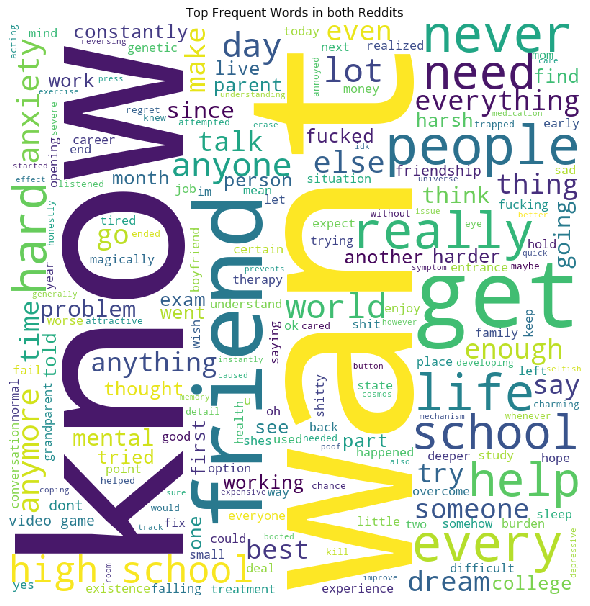

In [90]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(str(df_1k['selftext_title_clean']))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top Frequent Words in both Reddits")
  
plt.show()

In [83]:
#top bi-grams in both reddit threads
cv_commonthreads = CountVectorizer(stop_words=stops, ngram_range=(2,2))
commonthread_vocab = cv_commonthreads.fit_transform(df_1k['selftext_title_clean'])
commonthread_vocab_cv = pd.DataFrame(commonthread_vocab.toarray(), columns=cv_commonthreads.get_feature_names())
commonthread_vocab_cv.sum().sort_values(ascending=False).head(20)

want die         165
get better       126
every day        112
year old         102
mental health    100
even though       87
year ago          82
even know         81
anyone else       81
high school       80
every time        77
want end          76
dont know         76
really want       76
need help         74
first time        73
want live         70
best friend       69
one day           68
dont want         66
dtype: int64

# Data Prep for Modeling

In the following sections, I shall drop irrelevant features that I do not intend to feed into my model. 

In [85]:
df_1k.head()

,subreddit,title,selftext,author,num_comments,num_crossposts,is_suicidal,selftext_cleaned,title_cleaned,selftext_title_clean
0,SuicideWatch,i regret not having attempted to kill myself when i had the chance. i feel so trapped now. i really don’t know what to do anymore.,,Prudent_Struggle_733,93,0,1,,regret attempted kill chance feel trapped really know anymore,regret attempted kill chance feel trapped really know anymore
1,SuicideWatch,I never realized how little people care about me until I started having mental health problems.,"My experiences since developing severe depression and anxiety have been eye opening. Without going into the details, I honestly never knew how little people cared about me. A lot of people in my life that I’ve helped and listened to whenever they needed it have ended up just acting annoyed at me for opening up to them.\n\nI think if I was more charming or attractive maybe people would be more understanding, idk. I also think people are just generally selfish as a coping mechanism for their own difficult lives. They don’t have room for anyone else’s issues. \n\nAnyone else experience this?",wellshlt,5,0,1,experience since developing severe anxiety eye opening without going detail honestly never knew little people cared lot people life helped listened whenever needed ended acting annoyed opening think charming attractive maybe people would understanding idk also think people generally selfish coping mechanism difficult life room anyone else issue anyone else experience,never realized little people care started mental health problem,experience since developing severe anxiety eye opening without going detail honestly never knew little people cared lot people life helped listened whenever needed ended acting annoyed opening think charming attractive maybe people would understanding idk also think people generally selfish coping mechanism difficult life room anyone else issue anyone else experience never realized little people care started mental health problem
2,SuicideWatch,I wish I could just erase myself from existence.,"I wish I could press a button and then *poof* be instantly booted out of the cosmos, out of everyone's memory and reversing any effects I had on the universe.",bruhiminsane,34,0,1,wish could press button poof instantly booted cosmos everyone memory reversing effect universe,wish could erase existence,wish could press button poof instantly booted cosmos everyone memory reversing effect universe wish could erase existence
3,SuicideWatch,Is being depressed and suicidal just a normal part of growing up and accepting the harsh realities of this world?,"We're constantly told that everything will get better with exercise, medication and therapy. Sure, this does work for some people, but it does not magically fix the situation which caused the depressive symptoms. Yes, with treatment you can improve your situation and get your life back on track, but it's not a quick fix.\n\nHowever, treatment for Depression is fucking expensive which prevents people from seeking help in the first place.\n\nThe overwhelming majority of us are just depressed and suicidal because of the monotony of our daily lives. Doing shit that you don't want to do, in order to get money for doing the shit you don't want to do, then getting a few hours to do what you want to do until you have to repeat the cycle the next day. You just feel stuck and helpless.\n\nThis path is really enough to piss you off: School/College &gt; Job/Career &gt; Marriage &gt; Kids &gt; Retire &gt; Die. Fair enough, we need to earn money somehow and you can't just sit in your mum's basement drinking mountain dew and playing video games, but when you realise that you will be working from 18 to 64, you get the thought of ""what's the fucking point?"".\n\nYou may have dreams of being great, but you need to possess certain traits to be successful and be quite lucky to have that superstardom that we all dream of. A lot of us got fucked over by genetics 

In [86]:
#dropping 'subreddit', 'author_fullname', selftext', 'title' columns
#not dropping author as there are huge overlaps
df_1k_model = df_1k[['selftext_cleaned','title_cleaned','selftext_title_clean','is_suicidal']]
df_1k_model.head()

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal
0,,regret attempted kill chance feel trapped really know anymore,regret attempted kill chance feel trapped really know anymore,1
1,experience since developing severe anxiety eye opening without going detail honestly never knew little people cared lot people life helped listened whenever needed ended acting annoyed opening think charming attractive maybe people would understanding idk also think people generally selfish coping mechanism difficult life room anyone else issue anyone else experience,never realized little people care started mental health problem,experience since developing severe anxiety eye opening without going detail honestly never knew little people cared lot people life helped listened whenever needed ended acting annoyed opening think charming attractive maybe people would understanding idk also think people generally selfish coping mechanism difficult life room anyone else issue anyone else experience never realized little people care started mental health problem,1
2,wish could press button poof instantly booted cosmos everyone memory reversing effect universe,wish could erase existence,wish could press button poof instantly booted cosmos everyone memory reversing effect universe wish could erase existence,1
3,constantly told everything get better exercise medication therapy sure work people magically fix situation caused depressive symptom yes treatment improve situation get life back track quick fix however treatment fucking expensive prevents people seeking help first place overwhelming majority u monotony daily life shit want order get money shit want getting hour want repeat cycle next day feel stuck helpless path really enough piss school college job career marriage kid retire die fair enough need earn money somehow sit mum basement drinking mountain dew playing video game realise working get thought fucking point may dream great need posse certain trait successful quite lucky superstardom dream lot u got fucked genetics birth circumstance shitty family poverty make infinitely harder reach dream harsh world come appearance dream singer model good luck lost genetic lottery saying impossible hard look certain way every success story million failure young child zero responsibility naive innocent mind see world bright colour sunshine rainbow grow older begin realising world shitty place another hamster wheel slave like everyone else feel like natural response world live constantly sold solution carry miserable really enjoy small pleasure existence even thing like tv show movie music video game get boring,normal part growing accepting harsh reality world,constantly told everything get better exercise medication therapy sure work people magically fix situation caused depressive symptom yes treatment improve situation get life back track quick fix however treatment fucking expensive prevents people seeking help first place overwhelming majority u monotony daily life shit want order get money shit want getting hour want repeat cycle next day feel stuck helpless path really enough piss school college job career marriage kid retire die fair enough need earn money somehow sit mum basement drinking mountain dew playing video game realise working get thought fucking point may dream great need posse certain trait successful quite lucky superstardom dream lot u got fucked genetics birth circumstance shitty family poverty make infinitely harder reach dream harsh world come appearance dream singer model good luck lost genetic lottery saying impossible hard look certain way every success story million failure young child zero responsibility naive innocent mind see world bright colour sunshine rainbow grow older begin realising world shitty place another hamster wheel slave like everyone else feel like natural response world live constantly sold solution carry miserable really enjoy small pleasure existence even thing like tv show movie music video game g

# Export for Modeling

In [89]:
df_1k_model.to_csv('./datasets/df1k_cleaned.csv', index=False)